<img src="https://i.ibb.co/hcrKx44/Weekly-Challenge-Banner.png" >

# Weekly Challenge 5
## Description

Hello everyone and welcome to the fifth challenge! In this week's challenge, you will explore the *behind the scenes* of popular scientific computing libraries by implementing the [*K-Nearest Neighbors*](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) classification algorithm.


## The dataset

We will be using the wine dataset, widely used for classification tasks. Every wine in this dataset has a set of features describing it (e.g., alcohol content, color, acidity, etc.) and belongs to a category: class_0, class_1 or class_2. The exact meaning of class_X is not relevant, but let's assume it stands for wine quality - meaning class_2 wines are excellent, class_1 wines are passable and class_0 wines can be used for cooking at best. For this challenge, we will only be looking at 2 features: a wine's alcohol content and its color intensity.

## The task

Your task will be to code the [*K-Nearest Neighbors*](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (KNN) classification algorithm for these wines. The goal of this algorithm is to enable us to assign a new wine to an existing category based exclusively on the features of this new wine. The algorithm will pick the $K$ most similar wines from our existing dataset and assign the new wine to the category that appears most often among those $K$ neighbors (hence the name K-Nearest Neighbors). $K$ is a free parameter than can be modified to create a more or less precise algorithm. 

The *similarity* measure between two wines $w_1$ and $w_2$ is defined to be the *Euclidean distance* between the features of these two wines, that is:
$s = \left\lVert w_1 - w_2 \right\rVert_2 = \sqrt{\sum_{i=1}^2(w_{1,i} - w_{2,i})^2}$.

In other words, your task will be the following:
- For each new wine:
    - Find the $K$ points with the smallest Euclidean distance to the new wine
    - Find and return the label that occurs most often among those $K$ points (ties can be broken arbitrarily)

The boilerplate code below loads the dataset and defines a helper function to plot a KNN classifier. You will be able to compare your implementation's result with the scipy version.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from scipy import stats

# Load dataset
data = datasets.load_wine()

# We only take two features
feature_names = ['alcohol', 'color_intensity']
X = data.data[:, [data.feature_names.index(name) for name in feature_names]]
y = data.target

In [2]:
X[55:65]

array([[13.56,  6.25],
       [14.22,  6.38],
       [13.29,  6.  ],
       [13.72,  6.8 ],
       [12.37,  1.95],
       [12.33,  3.27],
       [12.64,  5.75],
       [13.67,  3.8 ],
       [12.37,  4.45],
       [12.17,  2.95]])

In [3]:
y[55:65]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [4]:
# Define visualization function
def plot_knn(fun, mesh_resolution=0.05):
    # Create color maps
    cmap_background = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_foreground = ['darkorange', 'c', 'darkblue']

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_resolution),
                         np.arange(y_min, y_max, mesh_resolution))
    Z = fun(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_background)

    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=data.target_names[y],
                    palette=cmap_foreground, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN classification decision boundaries")

    # Add axis labels
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.show()

## Solution

In [5]:
#################################################
############# YOUR CODE STARTS HERE #############
#################################################

def my_knn(points, n_neighbors):
    '''
    Parameters
    --------
    points: np.array[array[double]]
        An array of points, each represented as a 2-element array
    n_neighbors: int
        Number of nearest neighbors to consider for classification
    
    Returns
    --------
    labels: array[int]
        An array of categories, one for each point in `points`, in the 
        same order as `points`
    '''

    # Allocate array for the labels of the points
    labels = np.zeros((points.shape[0],), dtype=int)
    for i, point in enumerate(points):
        # Compute distances between this point and all points in X
        distances = np.linalg.norm(X - point, axis=1)
        # Find the labels of the `n_neighbors` closest neighbors
        neighbors = y[np.argpartition(distances, n_neighbors)[:n_neighbors]]
        # Select the label that occurs most often among these neighbors
        # This is also called the "mode" of a list
        labels[i] = stats.mode(neighbors)[0][0]

    return labels

#################################################
############## YOUR CODE ENDS HERE ##############
#################################################

### Test your code

Execute the cells below to test your implementation against the scipy version. You can play around with different numbers of neighbors to see the effect on the decision boundaries!

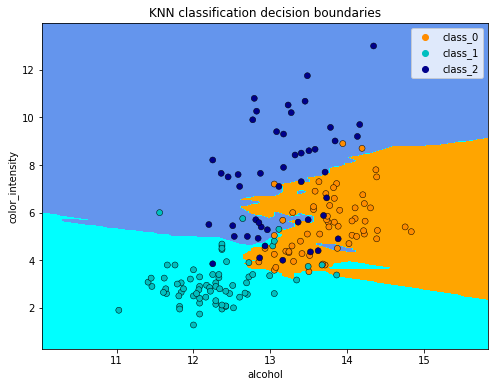

In [6]:
# Test your code
n_neighbors = 5

# Create an instance of scipy's KNN to validate our model against
scipy_classifier = neighbors.KNeighborsClassifier(n_neighbors)
scipy_classifier.fit(X, y)

# Plot scipy KNN
plot_knn(scipy_classifier.predict)

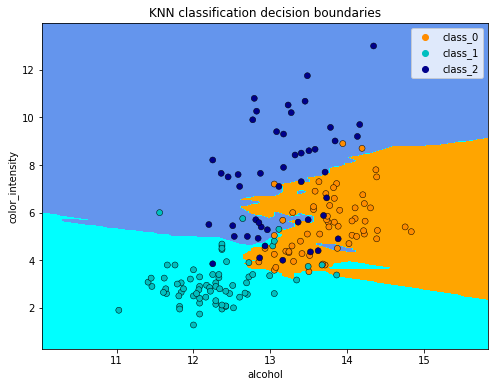

In [7]:
# Plot our version
plot_knn(lambda p: my_knn(p, n_neighbors))

## Answer to the submission question

The percentage (rounded to the nearest integer) of points assigned to cluster class_1 (i.e., the second cluster) when using a KNN with 7 neighbors is **69%**!

In [8]:
points = np.array([
    [14.6, 9.0],
    [12.2, 8.5],
    [14.9, 7.4],
    [12.1, 4.0],
    [11.7, 5.0],
    [13.5, 3.0],
    [15.3, 8.0],
    [14.0, 2.5],
    [12.1, 2.9],
    [12.3, 4.6],
    [13.1, 5.3],
    [12.3, 4.6],
    [13.3, 3.1],
    [12.2, 2.8],
    [12.2, 3.0],
    [11.9, 3.4],
])

labels = my_knn(points, 7)
round(len(labels[labels == 1]) * 100.0 / len(labels))

69

## Congratulations to everyone who found the solution!